<a href="https://colab.research.google.com/github/Alissssssa2003/Alissssssa2003/blob/main/2_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv('/content/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [38]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [39]:
categ_cols = df[["genre", "type"]]

In [40]:
num_cols = df[["episodes", "rating", "members"]]

In [41]:
label = list(categ_cols.columns)
label

['genre', 'type']

In [42]:
df_encoded = df.copy()
for l in label:
    one_hot_encoded = pd.get_dummies(df[l]).astype(int)
    # Drop the original column that was encoded from df_encoded
    df_encoded = df_encoded.drop(l, axis=1)
    # Concatenate one-hot encoded columns with original DataFrame
    df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

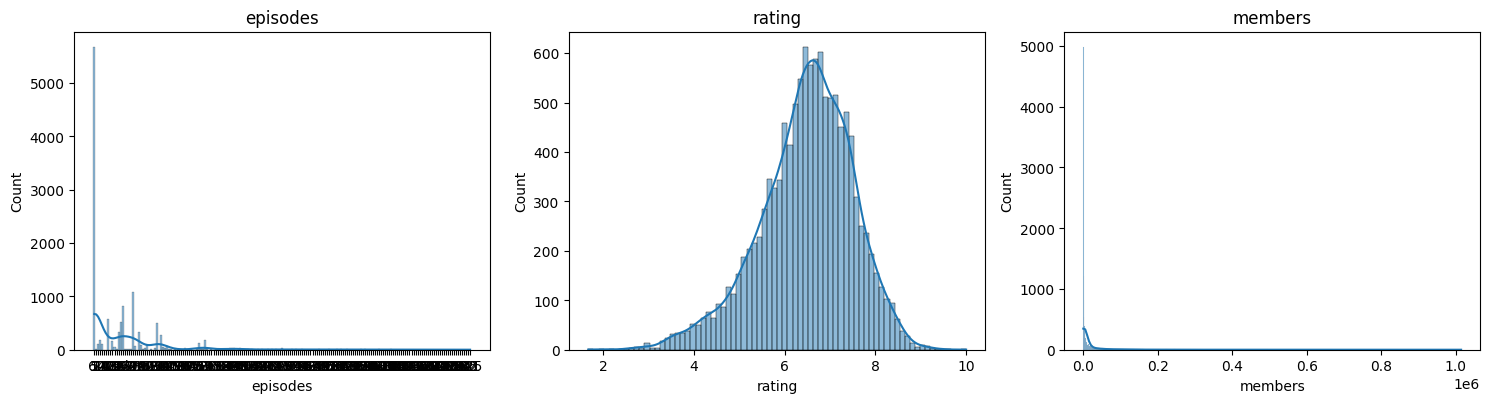

In [43]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cols[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [44]:
num_cols = num_cols[num_cols != "Unknown"]

In [45]:
from sklearn.preprocessing import StandardScaler


# Создайте экземпляр MinMaxScaler
scaler = StandardScaler()

# Примените масштабирование только к выбранным признакам
df_num_scaled = scaler.fit_transform(num_cols)

In [46]:
df_encoded[list(num_cols.columns)] = df_num_scaled

In [48]:
x = df_encoded.drop(["anime_id","name"],axis=1)
y = df_encoded["anime_id"]

In [53]:
from sklearn.model_selection import train_test_split
#разделение выборок
X_train_full,X_test,y_train_full,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train_full.shape

(9835, 3273)

In [54]:
model1 = keras.models.Sequential()

In [55]:
opt = keras.optimizers.Adam(learning_rate=1e-06) #ограничиваем скорость обучения - если пустить на самотек, то тоже будет грустно

In [74]:
   model1 = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(3273,)),  # Преобразуем входные данные в одномерную форму
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(50, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

In [75]:
model1.add(Dense(100, activation='relu', input_dim=81))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model1.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model1.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/25
31/31 [==============================] - 4s 45ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 2/25
31/31 [==============================] - 1s 37ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 3/25
31/31 [==============================] - 1s 33ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 4/25
31/31 [==============================] - 1s 23ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 5/25
31/31 [==============================] - 1s 23ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_

In [76]:
model2 = keras.models.Sequential()

In [77]:
opt = keras.optimizers.Adam(learning_rate=1e-06) #ограничиваем скорость обучения - если пустить на самотек, то тоже будет грустно

In [79]:
   model2 = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(3273,)),  # Преобразуем входные данные в одномерную форму
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(50, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

In [80]:
model2.add(Dense(500, activation='relu', input_dim=81))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model2.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model2.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/25
31/31 [==============================] - 5s 58ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 2/25
31/31 [==============================] - 1s 30ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 3/25
31/31 [==============================] - 1s 26ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 4/25
31/31 [==============================] - 1s 24ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 5/25
31/31 [==============================] - 1s 27ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_

In [81]:
model3 = keras.models.Sequential()

In [82]:
opt = keras.optimizers.Adam(learning_rate=1e-06)

In [83]:
   model3 = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(3273,)),  # Преобразуем входные данные в одномерную форму
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(50, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

In [84]:
model3.add(Dense(500, activation='relu', input_dim=81))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model3.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model3.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/25
31/31 [==============================] - 4s 43ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 2/25
31/31 [==============================] - 1s 26ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 3/25
31/31 [==============================] - 1s 27ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 4/25
31/31 [==============================] - 1s 27ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_loss: nan - val_binary_accuracy: 0.0000e+00 - val_binary_crossentropy: nan
Epoch 5/25
31/31 [==============================] - 1s 29ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan - val_

In [85]:
model2.evaluate(X_test,y_test)

77/77 [==============================] - 0s 4ms/step - loss: nan - binary_accuracy: 0.0000e+00 - binary_crossentropy: nan


[nan, 0.0, nan]

In [86]:
#предсказание
y_pred = model2.predict(X_test) > 0.5
y_pred[:30]

77/77 [==============================] - 1s 6ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [87]:
y_pred = y_pred.reshape(-1)*1
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
def generate_data(data, model):
    res = data.copy()
    categ_cols = res[["genre", "type"]]
    num_cols = res[["episodes", "rating", "members"]]
    label = list(categ_cols.columns)
    df_encoded = res.copy()

    for l in label:
        one_hot_encoded = pd.get_dummies(res[l]).astype(int)
        # Drop the original column that was encoded from df_encoded
        df_encoded = df_encoded.drop(l, axis=1)
        # Concatenate one-hot encoded columns with original DataFrame
        df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

    # Масштабирование числовых столбцов
    df_num_scaled = scaler.transform(num_cols)
    df_encoded[list(num_cols.columns)] = df_num_scaled

    y_pred = model.predict(df_encoded)  # Предполагается, что у вас есть обученная модель model
    return y_pred

In [90]:
data_t = df.copy()

In [91]:
data_t = data_t.drop(["name","anime_id"],axis=1)

In [105]:
data_t
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
